# IMF Economic Indicators: China vs India

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="darkgrid",palette="muted")

In [2]:
df_weo_2 = pd.read_csv('WEO_2.csv') 

In [3]:
df_weo_2.head()

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,1980,1981,1982,1983,1984,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,ABW,Aruba,346,Gross national savings (% of GDP),% of GDP,NaN,NaN,NaN,NaN,NaN,...,1.546600e+01,1.722100e+01,1.704400e+01,1.820300e+01,1.987200e+01,1.922800e+01,1.848700e+01,1.765400e+01,1.682600e+01,1.580800e+01
1,ABW,Aruba,347,"Inflation, average consumer prices",Index,NaN,NaN,NaN,NaN,NaN,...,1.183540e+02,1.173030e+02,1.167280e+02,1.207960e+02,1.224600e+02,1.247890e+02,1.273760e+02,1.300910e+02,1.328960e+02,1.357690e+02
2,ABW,Aruba,352,Population (WEO),Value,NaN,NaN,NaN,NaN,NaN,...,1.090000e+05,1.100000e+05,1.110000e+05,1.110000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.130000e+05,1.130000e+05,1.130000e+05
3,ABW,Aruba,354,General government total expenditure,National Currency,NaN,NaN,NaN,NaN,NaN,...,1.346000e+09,1.342000e+09,1.359000e+09,1.431000e+09,1.424000e+09,1.448000e+09,1.490000e+09,1.531000e+09,1.572000e+09,1.614000e+09
4,ABW,Aruba,355,General government net lending/borrowing,National Currency,NaN,NaN,NaN,NaN,NaN,...,-7.800000e+07,-7.800000e+07,-1.430000e+08,-9.800000e+07,-4.300000e+07,-3.000000e+07,-2.600000e+07,-1.800000e+07,-9.000000e+06,2.000000e+06


Data is 'wide' shaped

Change the values in the Indicator column to be strings

In [4]:
df_weo_2['Indicator'] = df_weo_2['Indicator'].astype(str)

## Extract India and China from DataFrame

New dataframes created for each country.

In [5]:
df_india = df_weo_2[df_weo_2['Country Name']=='India'] 
df_china = df_weo_2[df_weo_2['Country Name']=='China']

Drop unneeded columns.

In [6]:
df_india = df_india.drop(columns=['Country ISO3', 'Indicator Id'])
df_china = df_china.drop(columns=['Country ISO3', 'Indicator Id'])

## First eyeballing of the data - there seem to be one fewer row in the China dataframe

There are more rows with NA values at the beginning of the time period for India and China. What this implies is that not all indicators were measured at the beginning of the period.

However there is one fewer total rows in the India data frame. What is missing?

In [7]:
list_india = (df_india['Indicator'].tolist())
list_china = (df_china['Indicator'].tolist())
list_china

['Total investment (% of GDP)',
 'Gross national savings (% of GDP)',
 'Inflation, average consumer prices',
 'Population (WEO)',
 'General government total expenditure',
 'General government net lending/borrowing',
 'General government structural balance',
 'General government primary net lending/borrowing',
 'General government gross debt',
 'Gross domestic product corresponding to fiscal year',
 'Volume of imports (% change)',
 'Volume of exports (% change)',
 'General government total expenditure',
 'General government net lending/borrowing',
 'General government structural balance',
 'General government primary net lending/borrowing',
 'General government gross debt',
 'Inflation, average consumer prices',
 'Unemployment rate (% of total labor force) (WEO)']

In [8]:
for i in list_china:
    print (i in list_india)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False


The final entry in the list is Flase. This corresponds to 'Unemployment rate (% of total labor force) (WEO)'. Evedently it is not included in the raw data for India.

It is also apparant the some entries are duplicates. On investigation, it turns out that they are simply the indicator, but measured by dfferent means

## To avoid confusion down the line, let's add 'Subindicator Type' to the end of 'Indicator'
Indicator name duplicated. Remove indicators measured in national currency

In [9]:
df_india['Indicator'] =  df_india['Indicator'] + ' ' + '(' + df_india['Subindicator Type'].astype(str) +')'
df_china['Indicator'] =  df_china['Indicator'] + ' ' + '(' + df_china['Subindicator Type'].astype(str) +')'

In [10]:
df_india = df_india.loc[df_india['Subindicator Type'] != 'National Currency']
df_china = df_china.loc[df_china['Subindicator Type'] != 'National Currency']

In [11]:
df_india['Indicator']

1416               Total investment (% of GDP) (% of GDP)
1417         Gross national savings (% of GDP) (% of GDP)
1418           Inflation, average consumer prices (Index)
1419                             Population (WEO) (Value)
1426        Volume of imports (% change) (Percent change)
1427        Volume of exports (% change) (Percent change)
1428      General government total expenditure (% of GDP)
1429    General government net lending/borrowing (% of...
1430     General government structural balance (% of GDP)
1431    General government primary net lending/borrowi...
1432             General government gross debt (% of GDP)
1433    Inflation, average consumer prices (Percent ch...
Name: Indicator, dtype: object

## Create Baseline: Group together G20 countries

To add a baseline for the comparison of the two contries we will add mean values for G20 group of countries.

In [12]:
#List of countries in the G20 group

g20 = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy',\
       'Japan', 'Republic of Korea', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', \
           'United States', 'the European Union']

In [13]:
df_g20 = df_weo_2[df_weo_2['Country Name'].isin(g20)]
df_g20['Indicator'] =  df_g20['Indicator'] + ' ' + '(' + df_g20['Subindicator Type'].astype(str) +')'
df_g20.head()

<ipython-input-13-5efd5b611ba7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_g20['Indicator'] =  df_g20['Indicator'] + ' ' + '(' + df_g20['Subindicator Type'].astype(str) +')'


,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,1980,1981,1982,1983,1984,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
83,ARG,Argentina,345,Total investment (% of GDP) (% of GDP),% of GDP,2.098500e+01,1.876900e+01,1.817200e+01,1.732500e+01,1.644100e+01,...,1.707100e+01,1.905300e+01,1.875700e+01,2.077400e+01,1.696900e+01,1.507400e+01,1.519200e+01,1.512100e+01,1.493800e+01,1.454700e+01
84,ARG,Argentina,346,Gross national savings (% of GDP) (% of GDP),% of GDP,2.140100e+01,1.878900e+01,1.789000e+01,1.749300e+01,1.681800e+01,...,1.432800e+01,1.634000e+01,1.384300e+01,1.542000e+01,1.499300e+01,1.258700e+01,1.267100e+01,1.263800e+01,1.246600e+01,1.205800e+01
85,ARG,Argentina,347,"Inflation, average consumer prices (Index)",Index,NaN,NaN,NaN,NaN,NaN,...,NaN,1.682700e+02,2.114730e+02,2.839590e+02,4.080240e+02,5.027270e+02,5.953840e+02,6.713260e+02,7.266470e+02,7.686050e+02
86,ARG,Argentina,352,Population (WEO) (Value),Value,2.795000e+07,2.845000e+07,2.893000e+07,2.934000e+07,2.984000e+07,...,4.313200e+07,4.359000e+07,4.407200e+07,4.456000e+07,4.505200e+07,4.555100e+07,4.605400e+07,4.656400e+07,4.707800e+07,4.759900e+07
87,ARG,Argentina,354,General government total expenditure (National...,National Currency,NaN,NaN,NaN,NaN,NaN,...,2.463140e+12,3.411230e+12,4.382860e+12,5.680580e+12,7.560650e+12,9.363400e+12,1.128204e+13,1.303617e+13,1.436253e+13,1.550474e+13


Remove indicators that are measured in national currency

In [14]:
df_g20 = df_g20.loc[df_g20['Subindicator Type'] != 'National Currency']

In [15]:
#create groupby: indicator. extract G20 mean values

df_g20_gb = df_g20.groupby(['Indicator']).mean().reset_index()
df_g20_gb['Country Name'] = 'G20 mean'
df_g20_gb = df_g20_gb.drop(columns=['Indicator Id'])

## 2016 - 2019 change in Indicator values

New columns created.

In [16]:
df_india['5 Year % growth'] = (df_india['2019']-df_india['2014'])/df_india['2014']*100
df_china['5 Year % growth'] = ((df_china['2019'])-(df_china['2014']))/df_china['2014']*100
df_g20_gb['5 Year % growth'] = (df_g20_gb['2019']-df_g20_gb['2014'])/df_g20_gb['2014']*100

Plot out results.

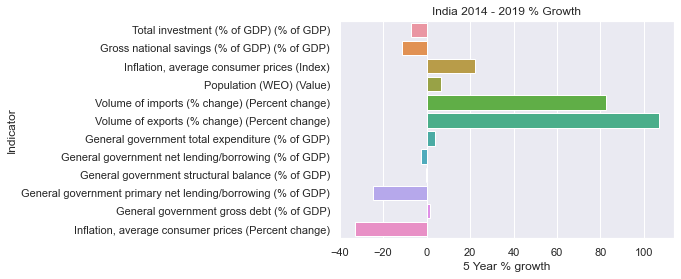

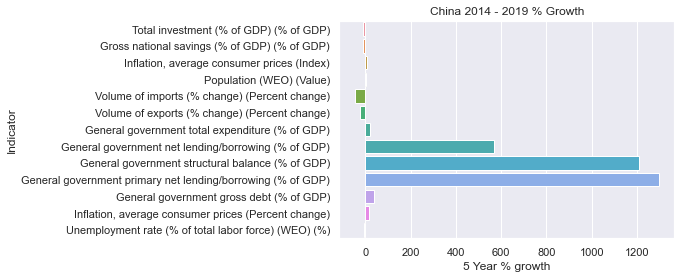

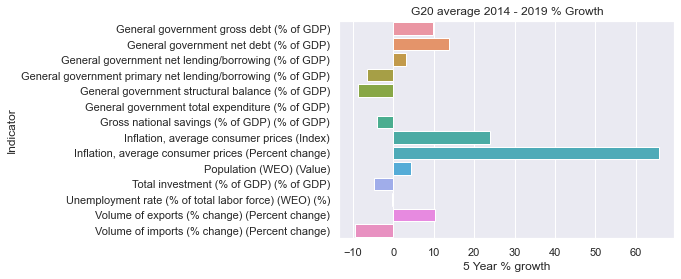

In [17]:
#plot barplot
fig, ax = plt.subplots()

ax = sns.barplot(y=df_india['Indicator'], x=df_india['5 Year % growth'], ci=None)
#ax.set_xticklabels(chart.get_xticklabels())
ax.set_title('India 2014 - 2019 % Growth')
plt.show()
ax = sns.barplot(y=df_china['Indicator'], x=df_china['5 Year % growth'], ci=None)
#ax.set_xticklabels(chart.get_xticklabels())
ax.set_title('China 2014 - 2019 % Growth')
plt.show()
ax = sns.barplot(y=df_g20_gb['Indicator'], x=df_g20_gb['5 Year % growth'], ci=None)
#ax.set_xticklabels(chart.get_xticklabels())
ax.set_title('G20 average 2014 - 2019 % Growth')
plt.show()

There are some interesting observations here. None of India, China or G20 show similar growth characteristics 

## Side-by-side comparison 
Combine China, India, G20 into large DataFrame

In [18]:
df_merged = pd.merge(df_india, df_china, how='outer') # merge India and China
df_merged_g20 = pd.merge(df_merged, df_g20_gb, how='outer') # merge new dataframe with G20

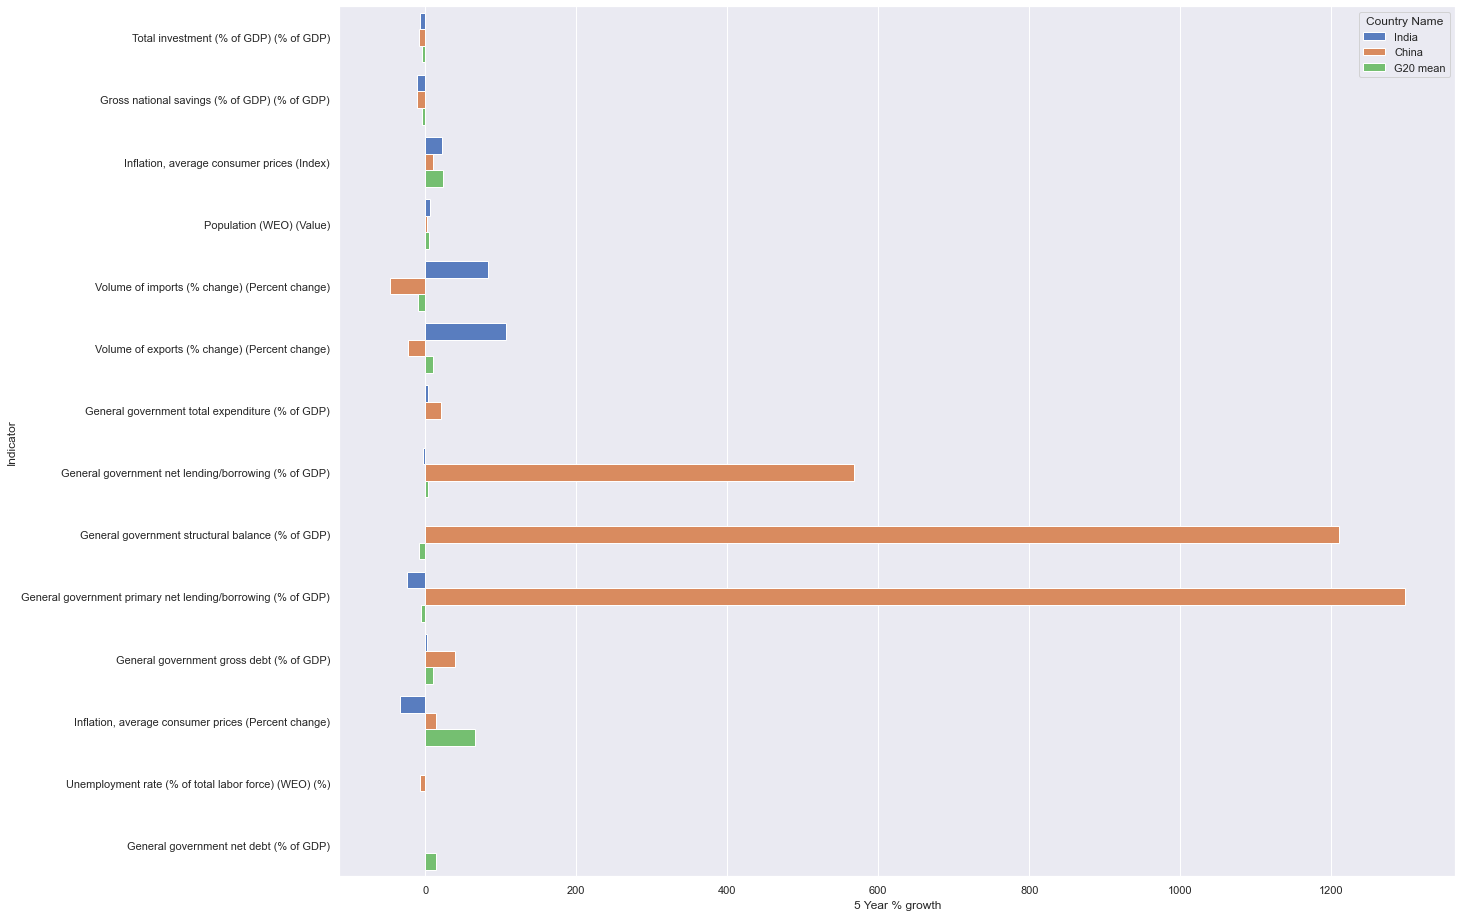

In [19]:
fig = plt.figure(figsize=(20,16))
chart=sns.barplot(x='5 Year % growth', y='Indicator', hue = 'Country Name', data = df_merged_g20, ci=None)

## Investigating past trends and future projection

In [20]:
#create variables for the selected time periods to be interrogated 

five_year = list(range(2015,2020))
twenty_year = list(range(2000,2020))
full_period = list(range(1980,2020))
projection = list(range(2020,2025))

#list of economic indicators to use in for loop
econ_indicators = df_india['Indicator'].tolist()
econ_indicators

['Total investment (% of GDP) (% of GDP)',
 'Gross national savings (% of GDP) (% of GDP)',
 'Inflation, average consumer prices (Index)',
 'Population (WEO) (Value)',
 'Volume of imports (% change) (Percent change)',
 'Volume of exports (% change) (Percent change)',
 'General government total expenditure (% of GDP)',
 'General government net lending/borrowing (% of GDP)',
 'General government structural balance (% of GDP)',
 'General government primary net lending/borrowing (% of GDP)',
 'General government gross debt (% of GDP)',
 'Inflation, average consumer prices (Percent change)']

In [21]:
#reshape into 'long' format 
df_merged_g20_melt = pd.melt(df_merged_g20, id_vars = ['Country Name', 'Indicator', 'Subindicator Type'], var_name = 'Year', value_name = 'Value')
df_merged_g20_melt.columns

Index(['Country Name', 'Indicator', 'Subindicator Type', 'Year', 'Value'], dtype='object')

In [22]:
#drop residual ''% growth' entries on data frame from last section 
index_to_drop = df_merged_g20_melt[df_merged_g20_melt['Year'] == '5 Year % growth'].index
df_merged_g20_melt = df_merged_g20_melt.drop(index_to_drop)

#Year column entries need to changed from object to int32 type - required for slicing
df_merged_g20_melt['Year'] = df_merged_g20_melt['Year'].astype(int) 
df_merged_g20_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1755 entries, 0 to 1754
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       1755 non-null   object 
 1   Indicator          1755 non-null   object 
 2   Subindicator Type  1125 non-null   object 
 3   Year               1755 non-null   int32  
 4   Value              1623 non-null   float64
dtypes: float64(1), int32(1), object(3)
memory usage: 75.4+ KB


## Display a key to be used for selecting indicator

In [23]:
#key for plotter function below...
print('Use this key to select indicator in below function:')
df_merged_g20_melt['Indicator'].head(18) # After the first 18 rows the indicators repeat


Use this key to select indicator in below function:


0                Total investment (% of GDP) (% of GDP)
1          Gross national savings (% of GDP) (% of GDP)
2            Inflation, average consumer prices (Index)
3                              Population (WEO) (Value)
4         Volume of imports (% change) (Percent change)
5         Volume of exports (% change) (Percent change)
6       General government total expenditure (% of GDP)
7     General government net lending/borrowing (% of...
8      General government structural balance (% of GDP)
9     General government primary net lending/borrowi...
10             General government gross debt (% of GDP)
11    Inflation, average consumer prices (Percent ch...
12               Total investment (% of GDP) (% of GDP)
13         Gross national savings (% of GDP) (% of GDP)
14           Inflation, average consumer prices (Index)
15                             Population (WEO) (Value)
16        Volume of imports (% change) (Percent change)
17        Volume of exports (% change) (Percent 

## Creation of functions: Extract selected indicator values

In [24]:
def twenty_year_plotter(n):
    df = df_merged_g20_melt.loc[(df_merged_g20_melt['Indicator']==econ_indicators[n])\
                                  & (df_merged_g20_melt['Year'].isin(twenty_year))]
    

    chart = sns.lineplot(x='Year', y='Value', hue='Country Name', data=df, ci=None)

    chart.set_title(econ_indicators[n])
    plt.show()

def five_year_plotter(n):
    df = df_merged_g20_melt.loc[(df_merged_g20_melt['Indicator']==econ_indicators[n])\
                                  & (df_merged_g20_melt['Year'].isin(five_year))]
    
    chart = sns.lineplot(x='Year', y='Value', hue='Country Name', data=df, ci=None)
    chart.set_title(econ_indicators[n])
    plt.show()
    
def forty_year_plotter(n):
    df = df_merged_g20_melt.loc[(df_merged_g20_melt['Indicator']==econ_indicators[n])\
                              & (df_merged_g20_melt['Year'].isin(full_period))]

    chart = sns.lineplot(x='Year', y='Value', hue='Country Name', data=df, ci=None)
    chart.set_title(econ_indicators[n])
    plt.show()
    
def all_ranges(n):
    
    five_year_plotter(n)
    twenty_year_plotter(n)
    forty_year_plotter(n)

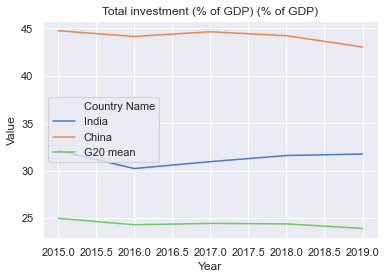

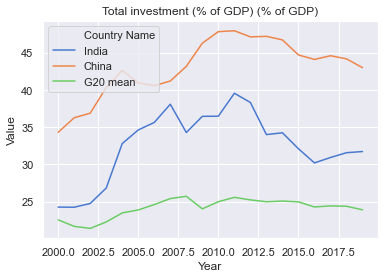

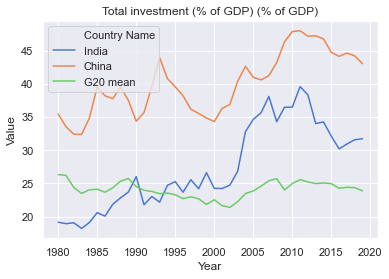

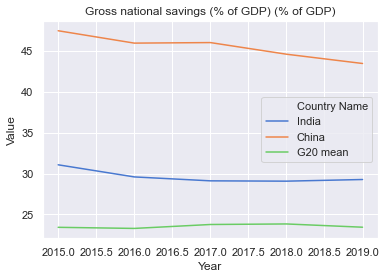

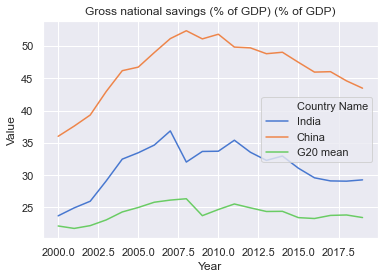

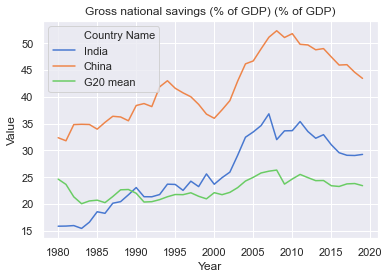

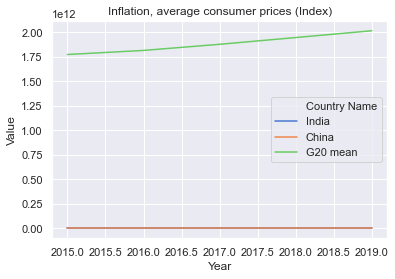

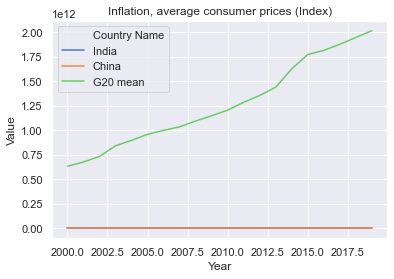

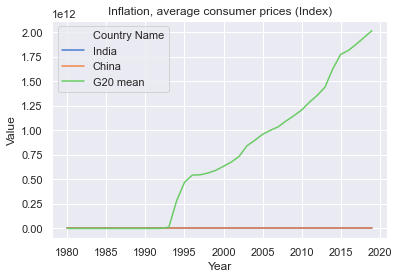

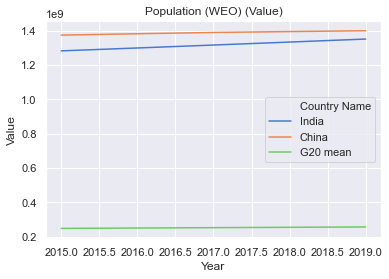

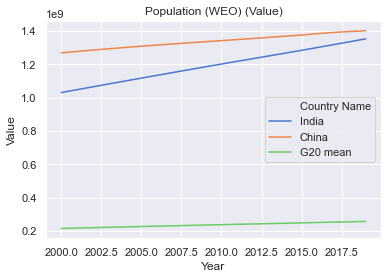

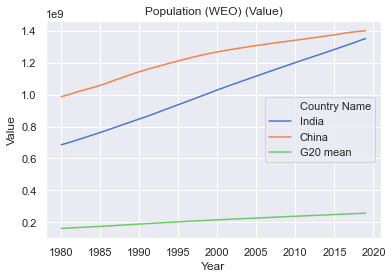

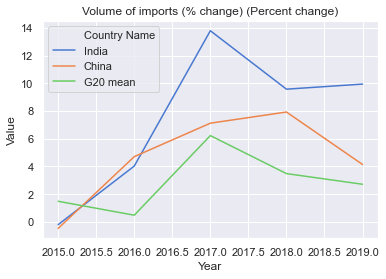

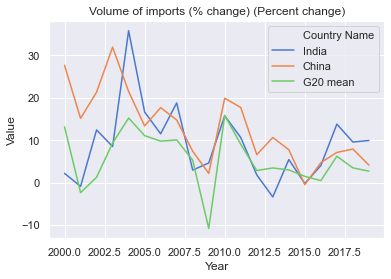

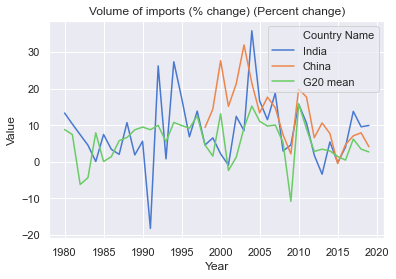

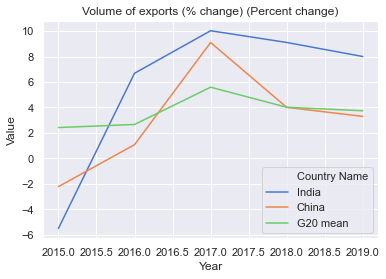

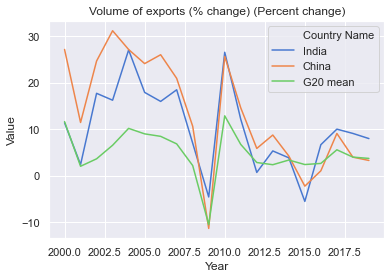

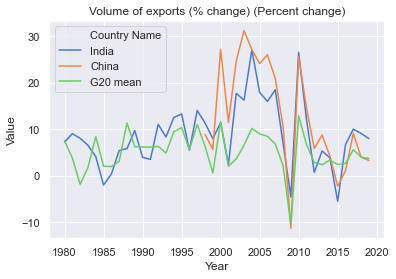

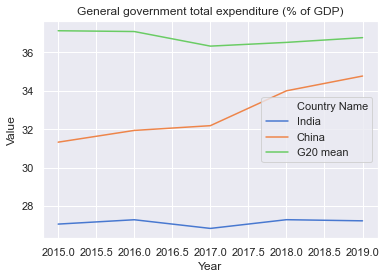

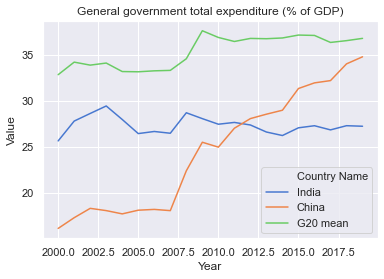

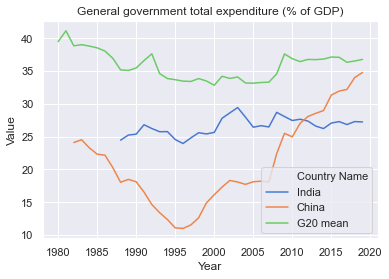

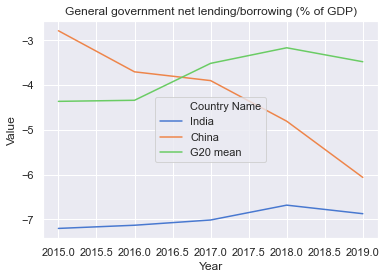

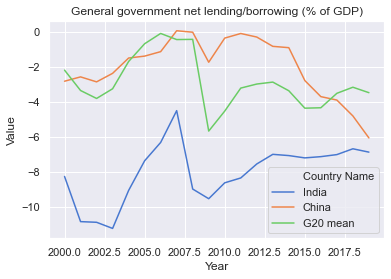

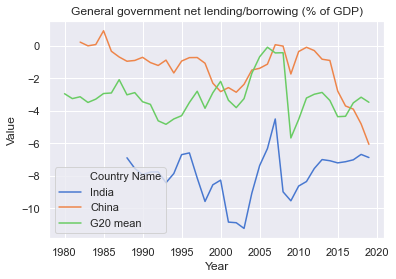

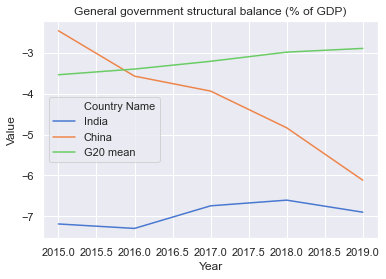

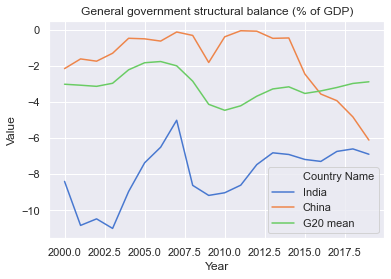

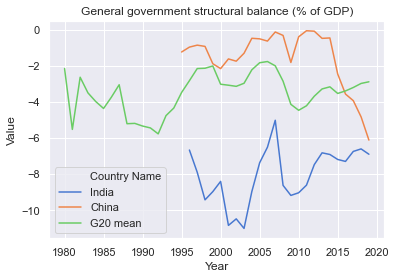

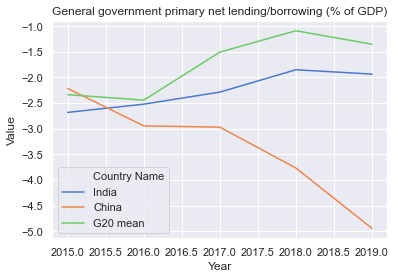

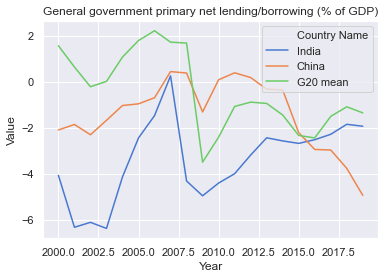

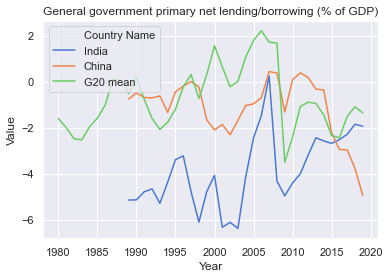

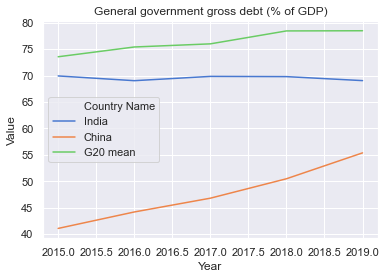

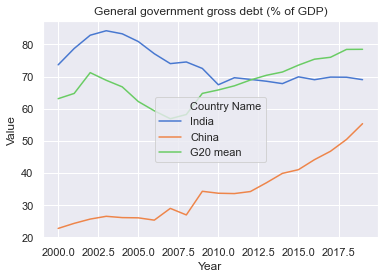

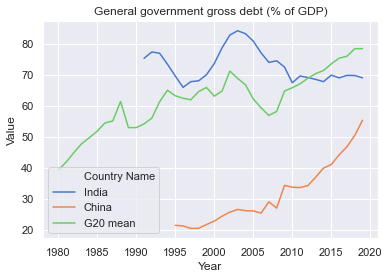

In [25]:
for n in range (0,11):
    all_ranges(n)